In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt

#open a file
excel_file = '/rong/0423.xlsx'
xl = pd.read_excel(excel_file)



In [2]:
#list all columns
xl.keys()

Index(['Cluster (current)', 'C_Name', 'eNodeB', 'eNodeB Site', 'eCell Sector',
       'eCell Band', 'Day', 'Half Hour', 'L.THRP.BITS.DL.LASTTTI',
       'L.THRP.TIME.DL.RMVLASTTTI', 'L.ChMeas.PRB.DL.Avail', 'L.Thrp.bits.DL',
       'L.Traffic.User.Avg', 'L.ChMeas.PRB.DL.Used.Avg', 'DL User Tput', 'UPT',
       'Service Time', 'PRB Uti', 'Metric', 'L.CA.Traffic.bits.DL.SCell',
       'L.CA.DLSCell.Act.Succ', 'L.CA.DLSCell.Act.Att',
       'L.CA.DL.SCell.Act.Dur', 'L.Thrp.bits.DL.QCI.8', 'L.Thrp.bits.DL.QCI.9',
       'L.ChMeas.PRB.DL.PCell.Used.Avg', 'L.ChMeas.PRB.DL.SCell.Used.Avg',
       'L.Traffic.User.PCell.DL.Avg', 'L.Traffic.User.SCell.DL.Avg',
       'L.CA.Traffic.bits.DL.Pcell', 'L.Traffic.User.SCell.Active.DL.Avg',
       'L.Traffic.User.SCell.Active.DL.Max', 'L.Traffic.User.Max',
       'L.Thrp.bits.DL.CAUser', 'L.Thrp.Time.DL.CAUser'],
      dtype='object')

In [16]:
#choose useful column and make a new container
x3 = xl[['eNodeB Site', 'eCell Sector','Day','PRB Uti']]
#create new column with two columns

x3['Group'] = xl['eNodeB Site'].astype(str) + ',' + xl['eCell Sector'].astype(str) + ',' + xl['Day'].astype(str)
#preview new excel container  
print (x3.shape)
print(x3.head(20))

(2261, 5)
   eNodeB Site eCell Sector        Day   PRB Uti                   Group
0        W1594        Alpha 2018-04-09  0.503620  W1594,Alpha,2018-04-09
1        W1594        Alpha 2018-04-09  0.635390  W1594,Alpha,2018-04-09
2        W1594        Alpha 2018-04-09  0.533205  W1594,Alpha,2018-04-09
3        W1594        Alpha 2018-04-09  0.185355  W1594,Alpha,2018-04-09
4        W1594        Alpha 2018-04-09  0.179155  W1594,Alpha,2018-04-09
5        W1594        Alpha 2018-04-09  0.151000  W1594,Alpha,2018-04-09
6        W1594        Alpha 2018-04-09  0.161275  W1594,Alpha,2018-04-09
7        W1594        Alpha 2018-04-09  0.146070  W1594,Alpha,2018-04-09
8        W1594        Alpha 2018-04-09  0.159675  W1594,Alpha,2018-04-09
9        W1594        Alpha 2018-04-09  0.040910  W1594,Alpha,2018-04-09
10       W1594        Alpha 2018-04-09  0.064210  W1594,Alpha,2018-04-09
11       W1594        Alpha 2018-04-09  0.060240  W1594,Alpha,2018-04-09
12       W1594        Alpha 2018-04-09  0

/Users/rong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [11]:
import numpy as np

#clone a datafarame add week column to datafarame
df = pd.DataFrame(x3 )
weeks = []

#get week index from date
for i in x3.index:
    dt = pd.to_datetime(x3['Day'][i])
    s = dt.strftime("%U")
    weeks.append( s)

df['week'] = weeks

#preview
print(df.head)

#save to a local file
df.to_excel('output123.xlsx')

<bound method NDFrame.head of      eNodeB Site eCell Sector        Day   PRB Uti                    New_d  \
0          W1594        Alpha 2018-04-09  0.503620   36.80570601933098Green   
1          W1594        Alpha 2018-04-09  0.635390  16.662278703882233Green   
2          W1594        Alpha 2018-04-09  0.533205  13.179749038097667Green   
3          W1594        Alpha 2018-04-09  0.185355  125.90408234742054Green   
4          W1594        Alpha 2018-04-09  0.179155  127.80004461518796Green   
5          W1594        Alpha 2018-04-09  0.151000   128.3313852759382Green   
6          W1594        Alpha 2018-04-09  0.161275  139.17454348059937Green   
7          W1594        Alpha 2018-04-09  0.146070   75.85270561586971Green   
8          W1594        Alpha 2018-04-09  0.159675  149.73959206273923Green   
9          W1594        Alpha 2018-04-09  0.040910   94.12663489611667Green   
10         W1594        Alpha 2018-04-09  0.064210   76.11413668602604Green   
11         W1594      

In [46]:
df1 = df.pivot_table(index=['eNodeB Site', 'eCell Sector',  'week'])
df1.head()

df1.to_excel('output1234.xlsx')

In [79]:
df[ (df['eNodeB Site']=='W4449') & 
   (df['eCell Sector']=='Gamma') &
   ( df['week']=='14' )  ].shape[0]

288

In [82]:
df[ (df['eNodeB Site']=='W4449') & (df['eCell Sector']=='Gamma') &( df['week']=='14' ) 
   & ( df["PRB Uti"] <0.05) ].shape

(251, 5)

In [83]:
df[ (df['eNodeB Site']=='W4449') & (df['eCell Sector']=='Gamma') &( df['week']=='14' ) 
   & ( df['PRB Uti'] <0.05) ].shape

(251, 5)

In [86]:
print(df['eNodeB Site'].unique())
print(df['eCell Sector'].unique())
print(df['week'].unique())



[u'W1594' u'W4449']
[u'Alpha' u'Beta' u'Gamma']
['14' '15']


final 14,W1594 {'Alpha': [245, 0, 47, 195], 'Beta': [288, 0, 68, 278], 'Gamma': [288, 0, 82, 250]}


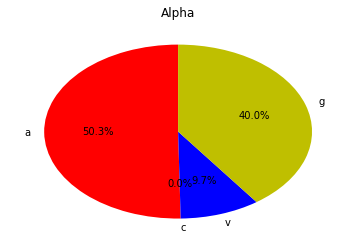

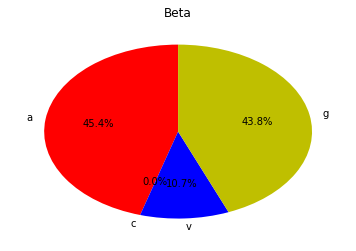

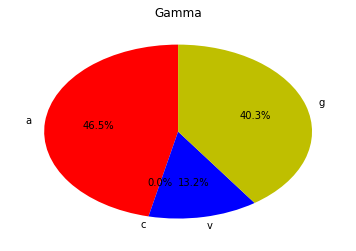

final 14,W4449 {'Alpha': [288, 0, 116, 288], 'Beta': [288, 10, 277, 288], 'Gamma': [288, 80, 278, 288]}


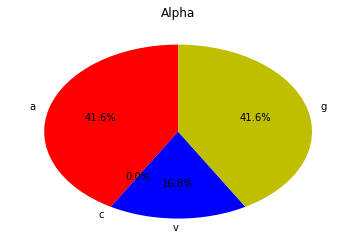

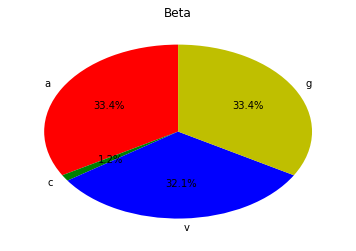

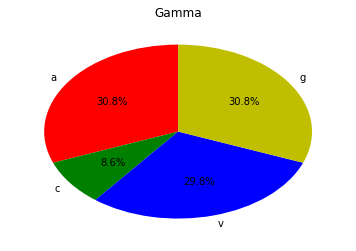

final 15,W1594 {'Alpha': [96, 0, 8, 50], 'Beta': [96, 0, 21, 89], 'Gamma': [96, 0, 22, 81]}


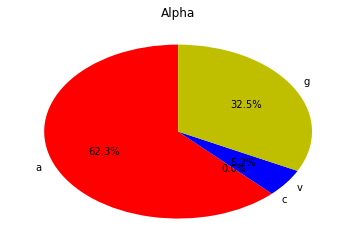

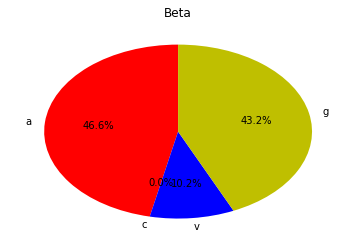

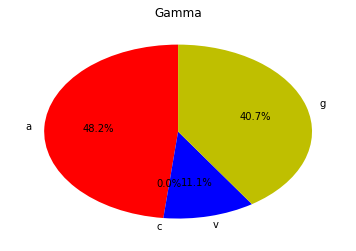

final 15,W4449 {'Alpha': [96, 0, 20, 96], 'Beta': [96, 7, 93, 96], 'Gamma': [96, 17, 93, 96]}


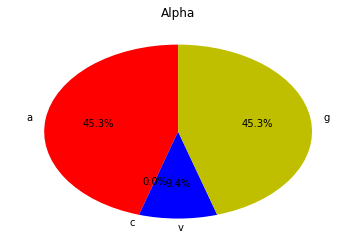

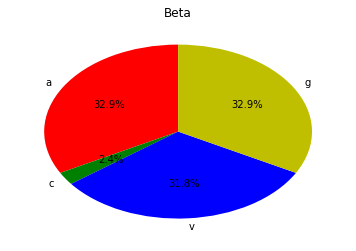

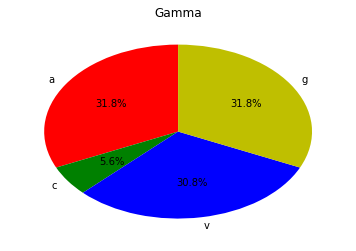

In [25]:
sites = df['eNodeB Site'].unique()
sectors = df['eCell Sector'].unique()
weeks_n = df['week'].unique()
threhold = [0.05,0.1,0.2,1]

final_data_map = {}

for wk in weeks_n:
    for site in sites:
        sector_map = {}
        for sector in sectors:
            threhold_count = df[ (df['eNodeB Site']==site) & (df['eCell Sector']==sector) &( df['week']==wk ) ].shape[0]
            threhold_count1 = df[ (df['eNodeB Site']==site) & (df['eCell Sector']==sector) &( df['week']==wk ) & ( df['PRB Uti'] <0.01)].shape[0]
            threhold_count2 = df[ (df['eNodeB Site']==site) & (df['eCell Sector']==sector) &( df['week']==wk ) & ( df['PRB Uti'] <0.1)].shape[0]
            threhold_count3 = df[ (df['eNodeB Site']==site) & (df['eCell Sector']==sector) &( df['week']==wk ) & ( df['PRB Uti'] <0.5)].shape[0]
            lt = [threhold_count,threhold_count1,threhold_count2,threhold_count3]
            sector_map[sector] = lt
            for th in threhold:
                n =df[ (df['eNodeB Site']==site) & (df['eCell Sector']==sector) &( df['week']==wk )& ( df['PRB Uti'] <th) ].shape
                #print( site, sector, wk, th, n)
        final_data_map[wk+','+site] = sector_map
    
activities = ['a','c','v','g']
colors = ['r', 'g','b','y']
#取每个分组，同一周的三个值
for key,value in final_data_map.items():
    # Data to plot
    print("final", key,value)
    for k1,v1 in value.items():
        plt.pie(v1, labels=activities, colors=colors, startangle=90, autopct='%.1f%%')
        plt.title(k1)

        plt.show()